In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# (1) 创建原始图像
img = cv.imread("Fig1101.png", flags=0)  # 读取灰度图像

In [3]:
# (2) np.fft.fft2 实现二维傅里叶变换
# fft = np.fft.fft2(img.astype(np.float32))
fft =        # 傅里叶变换，fft 是复数数组 (512, 512)
fftShift =   # 中心化，将低频分量移到频谱中心

In [4]:
# (3) np.fft.ifft2 实现二维傅里叶逆变换
iFftShift =   # 逆中心化，将低频逆转换回四角
ifft =        # 逆傅里叶变换，ifft 是复数数组 (512, 512)
rebuild =     # 重建图像，复数的模
print("img：{}, fft:{}, ifft:{}".format(img.shape, fft.shape, ifft.shape))

img：(512, 512), fft:(512, 512), ifft:(512, 512)


In [5]:
# (4) 傅里叶频谱的显示
fftAmp = np.abs(fft)  # 复数的模，幅度谱
ampLog = np.log(1 + fftAmp)  # 幅度谱对数变换
shiftFftAmp = np.abs(fftShift)  # 中心化幅度谱
shiftAmpLog = np.log(1 + shiftFftAmp)  # 中心化幅度谱对数变换
# phase = np.arctan2(fft.imag, fft.real)  # 计算相位角(弧度)
phase = np.angle(fft)  # 复数的幅角(弧度)
fftPhi = phase / np.pi * 180  # 转换为角度制 [-180, 180]
print("img min/max：{}, {}".format(img.min(), img.max()))
print("fftAmp min/max：{:.1f}, {:.1f}".format(fftAmp.min(), fftAmp.max()))
print("fftPhi min/max：{:.1f}, {:.1f}".format(fftPhi.min(), fftPhi.max()))
print("ampLog min/max: {:.1f}, {:.1f}".format(ampLog.min(), ampLog.max()))
print("rebuild min/max: {:.1f}, {:.1f}".format(rebuild.min(), rebuild.max()))

img min/max：0, 252
fftAmp min/max：52.3, 48426102.0
fftPhi min/max：-180.0, 180.0
ampLog min/max: 4.0, 17.7
rebuild min/max: 0.0, 252.0


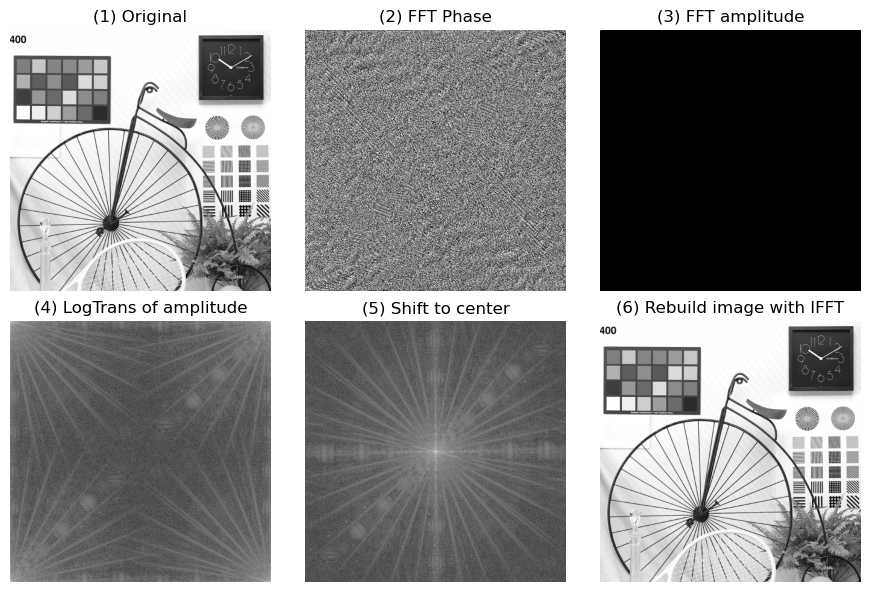

In [6]:
plt.figure(figsize=(9, 6))
plt.subplot(231), plt.title("(1) Original")
plt.imshow(img, cmap='gray'), plt.axis('off')
plt.subplot(232), plt.title("(2) FFT Phase"), plt.axis('off')
plt.imshow(fftPhi, cmap='gray'), plt.axis('off')
plt.subplot(233), plt.title("(3) FFT amplitude")
plt.imshow(fftAmp, cmap='gray'), plt.axis('off')
plt.subplot(234), plt.title("(4) LogTrans of amplitude")
plt.imshow(ampLog, cmap='gray'), plt.axis('off')
plt.subplot(235), plt.title("(5) Shift to center")
plt.imshow(shiftAmpLog, cmap='gray'), plt.axis('off')
plt.subplot(236), plt.title("(6) Rebuild image with IFFT")
plt.imshow(rebuild, cmap='gray'), plt.axis('off')
plt.tight_layout()
plt.show()